In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split


In [2]:
train = pd.read_csv("./train.csv")
train["target"] = train["target"].astype(int)
train.head()



,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,AURO,1/2/2021 0:30,19.2,temp_wxt,0,2,-1,0,1
1,AURO,1/2/2021 4:30,19.8,temp_wxt,0,2,-1,0,1
2,AURO,1/2/2021 5:30,19.5,temp_wxt,0,2,-1,0,1
3,AURO,1/2/2021 7:30,18.5,temp_wxt,0,2,-1,0,1
4,AURO,2/16/2021 2:30,17.7,temp_wxt,0,2,-1,0,1


In [3]:
# Check missing value for train.csv
train.isnull().sum()


Station    0
Ob         0
value      0
measure    0
target     0
R_flag     0
I_flag     0
Z_flag     0
B_flag     0
dtype: int64

In [4]:
synthetic_true = pd.read_csv("./Synthetic_true_complete.csv")
synthetic_true["target"] = synthetic_true["target"].astype(int)
synthetic_true.head()

,Unnamed: 0,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,0,BEAR,6/18/2021 14:16,10.577090,precip,1,0,0,-1,-1
1,1,REED,3/26/2021 15:59,12.303075,temp10,1,1,0,0,1
2,2,BEAR,2/18/2021 15:53,-1.538304,sr,1,0,-1,-1,-1
3,3,CLIN,2/7/2021 3:45,449.400027,ws02,1,0,-1,0,0
4,4,NEWL,1/7/2021 4:06,45.721796,sr,1,0,-1,0,-1


In [5]:
synthetic_true = synthetic_true.drop(columns=['Unnamed: 0'])
synthetic_true.head()

,Station,Ob,value,measure,target,R_flag,I_flag,Z_flag,B_flag
0,BEAR,6/18/2021 14:16,10.577090,precip,1,0,0,-1,-1
1,REED,3/26/2021 15:59,12.303075,temp10,1,1,0,0,1
2,BEAR,2/18/2021 15:53,-1.538304,sr,1,0,-1,-1,-1
3,CLIN,2/7/2021 3:45,449.400027,ws02,1,0,-1,0,0
4,NEWL,1/7/2021 4:06,45.721796,sr,1,0,-1,0,-1


In [6]:
# Check missing value for train.csv
synthetic_true.isnull().sum()

Station    0
Ob         0
value      0
measure    0
target     0
R_flag     0
I_flag     0
Z_flag     0
B_flag     0
dtype: int64

In [ ]:
# Numerical Feature: 'value', 'Ob', R_flag', 'I_flag', 'Z_flag','B_flag'
_,axss = plt.subplots(2,3, figsize=[20,10])
sns.boxplot(x='target', y ='value', data=train, ax=axss[0][0])
sns.boxplot(x='target', y ='R_flag', data=train, ax=axss[0][1])
sns.boxplot(x='target', y ='I_flag', data=train, ax=axss[0][2])
sns.boxplot(x='target', y ='Z_flag', data=train, ax=axss[1][0])
sns.boxplot(x='target', y ='B_flag', data=train, ax=axss[1][1])


In [ ]:
# Correlation Plot
corr_score = train[['value', 'R_flag', 'I_flag', 'Z_flag','B_flag']].corr()
corr_score


In [ ]:
# Categorial Feature
_,axss = plt.subplots(figsize=[10,10])
sns.countplot(x='target', hue='measure', data=train)


In [ ]:
sns.countplot(x='target', hue='Station', data=train)


In [ ]:
# Split categorical var and numerical var
train.dtypes

In [7]:
y_train = train.iloc[:, 4]
y_synthetic_true = synthetic_true.iloc[:, 4]

In [8]:
y_synthetic_true

0         1
1         1
2         1
3         1
4         1
         ..
629995    1
629996    1
629997    1
629998    1
629999    1
Name: target, Length: 630000, dtype: int64

In [9]:
# drop target and Ob
drop_target=['target', 'Ob']
X_train = train.drop(drop_target, axis=1)
x_synthetic_true = synthetic_true.drop(drop_target, axis=1)

In [10]:
# Split categorical var and numerical var
X_train.dtypes

Station     object
value      float64
measure     object
R_flag       int64
I_flag       int64
Z_flag       int64
B_flag       int64
dtype: object

In [11]:
x_synthetic_true.dtypes

Station     object
value      float64
measure     object
R_flag       int64
I_flag       int64
Z_flag       int64
B_flag       int64
dtype: object

In [12]:
cat_cols = X_train.columns[X_train.dtypes == 'O']
num_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')]

In [13]:
!pip install imbalanced-learn


In [14]:
import imblearn
print(imblearn.__version__)

0.9.0


In [15]:
# example of random undersampling to balance the class distribution
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
# summarize class distribution
print(Counter(y_train))
# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy=0.272)
# fit and apply the transform
X_over, y_over = undersample.fit_resample(X_train, y_train)
# summarize class distribution
print(Counter(y_over))

Counter({0: 6358102, 1: 235172})
Counter({0: 864602, 1: 235172})


In [16]:
# combine undersample data with synthetic true
X = pd.concat([X_over, x_synthetic_true])
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1729774 entries, 0 to 629999
Data columns (total 7 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Station  object 
 1   value    float64
 2   measure  object 
 3   R_flag   int64  
 4   I_flag   int64  
 5   Z_flag   int64  
 6   B_flag   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 105.6+ MB


In [17]:
# Verify the numbers of true class and false class. We have roughtly 1:1 ratio
y = pd.concat([y_over, y_synthetic_true])
print(Counter(y))

Counter({1: 865172, 0: 864602})


In [18]:
cat_cols = X_train.columns[X_train.dtypes == 'O']
num_cols = X_train.columns[(X_train.dtypes == 'float64') | (X_train.dtypes == 'int64')]

In [19]:
# split dataset
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.40, random_state=1)

print('training data has ' + str(X_train.shape[0]) + ' observation with ' + str(X_train.shape[1]) + ' features')
print('test data has ' + str(X_test.shape[0]) + ' observation with ' + str(X_test.shape[1]) + ' features')

training data has 1037864 observation with 7 features
test data has 691910 observation with 7 features


In [29]:
X_train.dtypes

Station                    object
value                     float64
R_flag                      int64
I_flag                      int64
Z_flag                      int64
B_flag                      int64
measure_blackglobetemp    float64
measure_impact            float64
measure_leafwetness       float64
measure_par               float64
measure_precip            float64
measure_pres              float64
measure_rh_hmp            float64
measure_rh_wxt            float64
measure_sm                float64
measure_sr                float64
measure_st                float64
measure_temp10            float64
measure_temp_wxt          float64
measure_ws02              float64
measure_ws06              float64
measure_ws10              float64
dtype: object

In [32]:



# One hot encoding for Station
from sklearn.preprocessing import OneHotEncoder

def OneHotEncoding(df, enc, categories):  
  transformed = pd.DataFrame(enc.transform(df[categories]).toarray(), columns=enc.get_feature_names_out(categories))
  return pd.concat([df.reset_index(drop=True), transformed], axis=1).drop(categories, axis=1)

categories = ['Station']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

In [33]:
# One hot encoding for measure
categories = ['measure']
enc_ohe = OneHotEncoder()
enc_ohe.fit(X_train[categories])

X_train = OneHotEncoding(X_train, enc_ohe, categories)
X_test = OneHotEncoding(X_test, enc_ohe, categories)

value           float64
R_flag            int64
I_flag            int64
Z_flag            int64
B_flag            int64
                 ...   
Station_WAYN    float64
Station_WHIT    float64
Station_WILD    float64
Station_WILL    float64
Station_WINE    float64
Length: 64, dtype: object

In [34]:
# Standardize and Normalize Data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train[num_cols] = scaler.transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [35]:
X_train

,value,R_flag,I_flag,Z_flag,B_flag,measure_blackglobetemp,measure_impact,measure_leafwetness,measure_par,measure_precip,...,Station_SILR,Station_SPIN,Station_SPRU,Station_TAYL,Station_UNCA,Station_WAYN,Station_WHIT,Station_WILD,Station_WILL,Station_WINE
0,0.005342,-0.369608,-0.532199,0.673022,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.295225,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.345830,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.346606,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.347456,-0.369608,-0.532199,2.972607,-0.998856,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1037859,-0.346928,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1037860,-0.346744,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037861,-0.312253,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037862,-0.346568,-0.369608,-0.532199,-0.476771,0.687156,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Logistic Regression
classifier_logistic = LogisticRegression(solver='lbfgs', max_iter=3000)

# Naive Bayes
classifier_bayes=GaussianNB()

# K Nearest Neighbors
classifier_KNN = KNeighborsClassifier(n_neighbors=3, n_jobs=-1)

# Random Forest
classifier_RF = RandomForestClassifier(max_depth=3, random_state=0)

In [43]:
# Logistics
classifier_logistic.fit(X_train, y_train)


LogisticRegression(max_iter=3000)

In [44]:
classifier_logistic.score(X_test, y_test)


0.8604052550187163

In [52]:
# KNN
classifier_KNN.fit(X_train, y_train)



KNeighborsClassifier(n_jobs=-1, n_neighbors=3)

In [53]:
# KNN runs forever, so eliminate KNN classifer
classifier_KNN.predict(X_test)


KeyboardInterrupt: 

In [ ]:
classifier_KNN.score(X_test, y_test)

In [ ]:
# naive Bayes

In [54]:
classifier_bayes.fit(X_train, y_train)

GaussianNB()

In [55]:
classifier_bayes.predict(X_test)


array([1, 1, 0, ..., 1, 1, 1])

In [56]:
classifier_bayes.score(X_test, y_test)


0.7729198884247951

In [57]:
# Random Forest
classifier_RF.fit(X_train, y_train)


RandomForestClassifier()

In [58]:
classifier_RF.predict(X_test)


array([1, 0, 0, ..., 1, 0, 1])

In [59]:
classifier_RF.score(X_test, y_test)


0.9874535705510832

In [60]:
# Use 5-fold Cross Validation to get the accuracy for different models
model_names = ['Logistic Regression','Random Forest','Naive Bayes']
model_list = [classifier_logistic, classifier_RF, classifier_bayes]
count = 0

for classifier in model_list:
    cv_score = model_selection.cross_val_score(classifier, X_train, y_train, cv=5)
    print(cv_score)
    print('Model accuracy of ' + model_names[count] + ' is ' + str(cv_score.mean()))
    count += 1

[0.85906645 0.86219788 0.86137889 0.86179802 0.86127223]
Model accuracy of Logistic Regression is 0.8611426931944262
[0.9866023  0.98738275 0.98751764 0.98716596 0.98754649]
Model accuracy of Random Forest is 0.9872430302076761
[0.77059637 0.76916555 0.77361217 0.77214763 0.77262348]
Model accuracy of Naive Bayes is 0.7716290390594878


In [62]:
# Find Hyperparameter for ramdom forest

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators' : [60,80,100],
    'max_depth': [1,5,10]
}
Grid_RF = GridSearchCV(RandomForestClassifier(),parameters, cv=5)
Grid_RF.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 10],
                         'n_estimators': [60, 80, 100]})

In [64]:
# helper function for printing out grid search results 
def print_grid_search_metrics(gs):
    print ("Best score: " + str(gs.best_score_))
    print ("Best parameters set:")
    best_parameters = gs.best_params_
    for param_name in sorted(best_parameters.keys()):
        print(param_name + ':' + str(best_parameters[param_name]))
        
print_grid_search_metrics(Grid_RF)

# Not as good as default, so we will just stay with default RF classfier


Best score: 0.9655918322426299
Best parameters set:
max_depth:10
n_estimators:100


In [65]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score



In [75]:
def train_evaluate_pipeline(X_train, y_train, X_test, y_test, model, digits=4):

    Y_test_predicted = model.fit(X=X_train, y=y_train).predict(X_test)
    metric = classification_report(y_test,Y_test_predicted,digits=digits)
    
    return metric

In [76]:
# Confusion matrix, accuracy, precison and recall for random forest

print("RF Classifer")
RF_metrics = train_evaluate_pipeline(X_train, y_train, X_test, y_test, classifier_RF)
print("Random Forest")
print(RF_metrics)


RF Classifer
Random Forest
              precision    recall  f1-score   support

           0     0.9890    0.9858    0.9874    345915
           1     0.9859    0.9890    0.9875    345995

    accuracy                         0.9874    691910
   macro avg     0.9874    0.9874    0.9874    691910
weighted avg     0.9874    0.9874    0.9874    691910



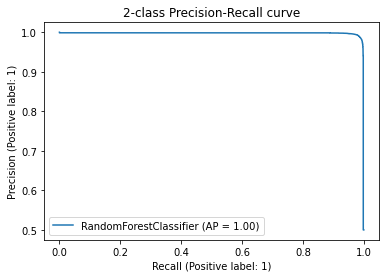

In [68]:
# Plot the Precision-Recall curve to evaulate
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    classifier_RF, X_test, y_test
)
_ = display.ax_.set_title("2-class Precision-Recall curve")
